
# Reconhecimento de dígitos manuscritos

Este exemplo demonstra como o scikit-learn pode ser usado para reconhecer imagens de 
dígitos manuscritos, de 0 a 9.


In [35]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Importações padrão do Python científico
import matplotlib.pyplot as plt

# Importar conjuntos de dados, classificadores e métricas de desempenho
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## Conjunto de dados de Dígitos

O conjunto de dados de dígitos consiste em imagens de dígitos de 8x8
pixels. O atributo "images" do conjunto de dados armazena
matrizes de 8x8 com valores de escala de cinza para cada imagem. Usaremos essas matrizes para
visualizar as 4 primeiras imagens. O atributo "target" do conjunto de dados armazena
o dígito que cada imagem representa, e isso está incluído no título das 4
gráficos abaixo.

Observação: se estivéssemos trabalhando com arquivos de imagem (por exemplo, arquivos 'png'), os carregaríamos usando a função `matplotlib.pyplot.imread`.


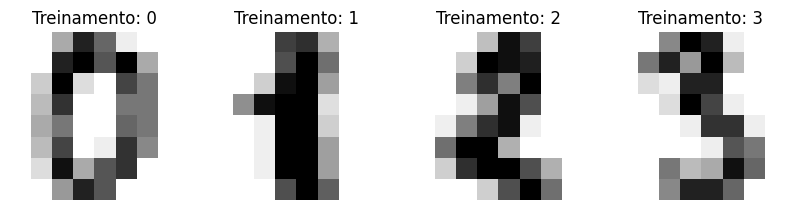

In [36]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Treinamento: %i" % label)

## Classificação

Para aplicar um classificador a esses dados, precisamos achatar as imagens, transformando
cada matriz 2-D de valores de escala de cinza com forma (8, 8) em forma
(64,). Posteriormente, todo o conjunto de dados terá a forma
(n_amostras, n_características), onde n_amostras é o número de imagens e
n_características é o número total de pixels em cada imagem.

Podemos, em seguida, dividir os dados em subconjuntos de treinamento e teste e ajustar um classificador de vetor de suporte
nos exemplos de treinamento. O classificador ajustado pode
subsequentemente ser usado para prever o valor do dígito para as amostras
no subconjunto de teste.

In [41]:
# Achatar as imagens
n_amostras = len(digits.images)
dados = digits.images.reshape((n_amostras, -1))

# Criar um classificador: um classificador de rede neural
clf = MLPClassifier(solver='adam', hidden_layer_sizes=2, alpha=1e-04)

# Dividir os dados em 50% de subconjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    dados, digits.target, test_size=0.5, shuffle=False
)

# Aprender os dígitos no subconjunto de treinamento
clf.fit(X_treino, y_treino)

# Prever o valor do dígito no subconjunto de teste
previsto = clf.predict(X_teste)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Abaixo, visualizamos as 4 primeiras amostras de teste e mostramos seu valor de dígito previsto no título.


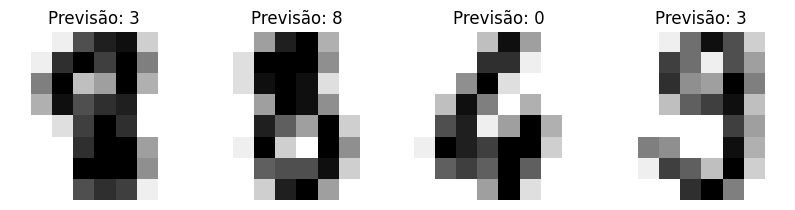

In [42]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, imagem, previsao in zip(axes, X_teste, previsto):
    ax.set_axis_off()
    imagem = imagem.reshape(8, 8)
    ax.imshow(imagem, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Previsão: {previsao}")

A função `sklearn.metrics.classification_report` cria um relatório de texto mostrando
as principais métricas de classificação.

In [43]:
print(
    f"Relatório de classificação para o classificador {clf}:\n"
    f"{metrics.classification_report(y_teste, previsto)}\n"
)


Relatório de classificação para o classificador MLPClassifier(hidden_layer_sizes=2):
              precision    recall  f1-score   support

           0       0.19      0.95      0.31        88
           1       0.00      0.00      0.00        91
           2       0.30      0.19      0.23        86
           3       0.23      0.80      0.36        91
           4       0.00      0.00      0.00        92
           5       0.11      0.04      0.06        91
           6       0.00      0.00      0.00        91
           7       0.20      0.01      0.02        89
           8       0.16      0.05      0.07        88
           9       0.29      0.04      0.08        92

    accuracy                           0.21       899
   macro avg       0.15      0.21      0.11       899
weighted avg       0.15      0.21      0.11       899




/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Também podemos plotar uma `matriz de confusão` dos
valores reais e dos valores de dígito previstos.

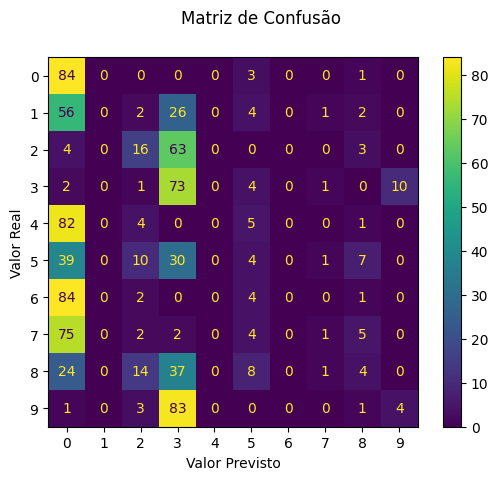

In [44]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_teste, previsto)
disp.figure_.suptitle("Matriz de Confusão")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.show()